In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, accuracy_score, auc, confusion_matrix, classification_report, make_scorer, mean_absolute_error
from ggplot import *
%matplotlib inline


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The

In [2]:
#Read data
data = pd.read_csv('UCI_Credit_Card.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
#Bill amount summary 
data[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [4]:
#Pay amount summary 
data[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [5]:
#Limit balance summary
data.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [6]:
#Rename the columns
data = data.rename(columns= {'default.payment.next.month' : 'y', 'PAY_0' : 'PAY_1'})
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,y
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [7]:
y = data['y'].copy()

In [8]:
#data clearning 
fill = (data.EDUCATION == 5) |(data.EDUCATION == 6)|(data.EDUCATION == 0)
data.loc[fill, 'EDUCATION'] = 4
data.loc[data.MARRIAGE == 0, 'MARRIAGE'] = 3

#relabel the pay dult number -1 and -2 merge as 0
fill = (data.PAY_1 == -2) | (data.PAY_1 == -1)|(data.PAY_1 == 0)
data.loc[fill, 'PAY_1'] = 0
fill = (data.PAY_2 == -2) | (data.PAY_2 == -1)|(data.PAY_2 == 0)
data.loc[fill, 'PAY_2'] = 0
fill = (data.PAY_3 == -2) | (data.PAY_3 == -1)|(data.PAY_3 == 0)
data.loc[fill, 'PAY_3'] = 0
fill = (data.PAY_4 == -2) | (data.PAY_4 == -1)|(data.PAY_4 == 0)
data.loc[fill, 'PAY_4'] = 0
fill = (data.PAY_5 == -2) | (data.PAY_5 == -1)|(data.PAY_5 == 0)
data.loc[fill, 'PAY_5'] = 0
fill = (data.PAY_6 == -2) | (data.PAY_6 == -1)|(data.PAY_6 == 0)
data.loc[fill, 'PAY_6'] = 0

In [9]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,y
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [10]:
#Merge the sex and marriage together 
data['SEX_MARRIAGE'] = 0
data.loc[((data.SEX == 1) & (data.MARRIAGE == 1)), 'SEX_MARRIAGE'] = 1 #married_man
data.loc[((data.SEX == 1) & (data.MARRIAGE == 2)), 'SEX_MARRIAGE'] = 2 #single man
data.loc[((data.SEX == 1) & (data.MARRIAGE == 3)), 'SEX_MARRIAGE'] = 3 #divorced man
data.loc[((data.SEX == 2) & (data.MARRIAGE == 1)), 'SEX_MARRIAGE'] = 4 #married woman
data.loc[((data.SEX == 2) & (data.MARRIAGE == 2)), 'SEX_MARRIAGE'] = 5 #single woman
data.loc[((data.SEX == 2) & (data.MARRIAGE == 3)), 'SEX_MARRIAGE'] = 6 #divorced woman

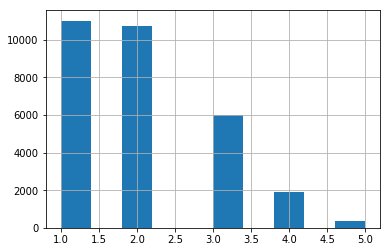

In [11]:
#Age binning into the age group
data['AGE_GROUP'] = pd.cut(data['AGE'], 6, labels = [1,2,3,4,5,6])
data['AGE_GROUP'] = pd.to_numeric(data['AGE_GROUP'])
data.loc[(data['AGE_GROUP'] == 6), 'AGE_GROUP'] = 5
data.AGE_GROUP.hist()

In [12]:
#find out the sex destribution in each age group
data['SEX_AGE'] = 0
data.loc[((data.SEX == 1) & (data.AGE_GROUP == 1)), 'SEX_AGE'] = 1 #man in 20s'
data.loc[((data.SEX == 1) & (data.AGE_GROUP == 2)), 'SEX_AGE'] = 2 #man in 30s'
data.loc[((data.SEX == 1) & (data.AGE_GROUP == 3)), 'SEX_AGE'] = 3 #man in 40s'
data.loc[((data.SEX == 1) & (data.AGE_GROUP == 4)), 'SEX_AGE'] = 4 #man in 50s'
data.loc[((data.SEX == 1) & (data.AGE_GROUP == 5)), 'SEX_AGE'] = 5 #man in 60s' and above
data.loc[((data.SEX == 2) & (data.AGE_GROUP == 1)), 'SEX_AGE'] = 6 #woman in 20s'
data.loc[((data.SEX == 2) & (data.AGE_GROUP == 2)), 'SEX_AGE'] = 7 #woman in 20s'
data.loc[((data.SEX == 2) & (data.AGE_GROUP == 3)), 'SEX_AGE'] = 8 #woman in 20s'
data.loc[((data.SEX == 2) & (data.AGE_GROUP == 4)), 'SEX_AGE'] = 9 #woman in 20s'
data.loc[((data.SEX == 2) & (data.AGE_GROUP == 5)), 'SEX_AGE'] = 10 #woman in 20s' and above

In [13]:
#find out how far the bill is from the limit should matter, weight the difference on the limite balance attributes
data['BILL_PAY_Ratio_6'] = (data.BILL_AMT6 - data.PAY_AMT6) / data.LIMIT_BAL
data['BILL_PAY_Ratio_5'] = (data.BILL_AMT5 - data.PAY_AMT5) / data.LIMIT_BAL
data['BILL_PAY_Ratio_4'] = (data.BILL_AMT4 - data.PAY_AMT4) / data.LIMIT_BAL
data['BILL_PAY_Ratio_3'] = (data.BILL_AMT3 - data.PAY_AMT3) / data.LIMIT_BAL
data['BILL_PAY_Ratio_2'] = (data.BILL_AMT2 - data.PAY_AMT2) / data.LIMIT_BAL
data['BILL_PAY_Ratio_1'] = (data.BILL_AMT1 - data.PAY_AMT1) / data.LIMIT_BAL


In [14]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,y,SEX_MARRIAGE,AGE_GROUP,SEX_AGE,BILL_PAY_Ratio_6,BILL_PAY_Ratio_5,BILL_PAY_Ratio_4,BILL_PAY_Ratio_3,BILL_PAY_Ratio_2,BILL_PAY_Ratio_1
0,1,20000.0,2,2,1,24,2,2,0,0,...,1,4,1,6,0.000000,0.000000,0.000000,0.034450,0.120650,0.195650
1,2,120000.0,2,2,2,26,0,2,0,0,...,1,5,1,6,0.010508,0.028792,0.018933,0.014017,0.006042,0.022350
2,3,90000.0,2,2,2,34,0,0,0,0,...,0,5,2,7,0.117211,0.154978,0.148122,0.139544,0.139189,0.308011
3,4,50000.0,2,2,1,37,0,0,0,0,...,0,4,2,7,0.570940,0.557800,0.544280,0.961820,0.924280,0.899800
4,5,50000.0,1,2,1,57,0,0,0,0,...,0,1,4,4,0.369040,0.369140,0.238800,0.516700,-0.620220,0.132340


In [15]:
#Data spliting for tranining and testing
features = ['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6', 
            'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
            'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6',
            'SEX_MARRIAGE', 'AGE_GROUP','SEX_AGE',
            'BILL_PAY_Ratio_6', 'BILL_PAY_Ratio_5','BILL_PAY_Ratio_4','BILL_PAY_Ratio_3','BILL_PAY_Ratio_2','BILL_PAY_Ratio_1']

y = data['y'].copy()
X = data[features].copy()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)



In [16]:
#Function to make the prediction result
def model(md, x_train, y_train,x_test, y_test):
    md.fit(x_train, y_train)
    pred = md.predict(x_test)
    prob = md.predict_proba(x_test)[:,1]
    print (' ') 
    print ('Accuracy on Train set: ', md.score(x_train, y_train))
    print ('Accuracy on Test set: ', md.score(x_test, y_test))
    print (' ')
    print(classification_report(y_test, pred))
    print (' ')
    print ('Confusion Matrix')
    confmat(pred, y_test)
    roc(prob, y_test)
    return md

In [17]:
# Function to generate confusion matrix
def confmat(pred, y_test):
    conmat = np.array(confusion_matrix(y_test, pred, labels=[1,0]))
    conf = pd.DataFrame(conmat, index=['Defaulter', 'Not Defaulter'],
                             columns=['Predicted Defaulter', 'Predicted Not Defaulter'])
    print (conf)

In [18]:
# Function to generate roc curve
def roc(prob, y_test):
    y_score = prob
    fpr = dict()
    tpr = dict()
    roc_auc=dict()
    fpr[1], tpr[1], _ = roc_curve(y_test, y_score)
    roc_auc[1] = auc(fpr[1], tpr[1])
    plt.figure(figsize=[7,7])
    plt.plot(fpr[1], tpr[1], label='Roc curve (area=%0.2f)' %roc_auc[1], linewidth=4)
    plt.plot([1,0], [1,0], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive rate', fontsize=15)
    plt.ylabel('True Positive rate', fontsize=15)
    plt.title('ROC curve for Credit Default', fontsize=16)
    plt.legend(loc='Lower Right')
    plt.show()

In [19]:
#sampling by values increasing
data_train = X_train.join(y_train)
data_majority = data_train[data_train.y == 0]
data_minority = data_train[data_train.y == 1]

data_minority_upsample = resample(data_minority,
                                  replace = True,
                                  n_samples = len(data_majority),
                                  random_state = 587)
data_upsampled = pd.concat([data_majority, data_minority_upsample])
y_upsampled = data_upsampled.y
x_upsampled = data_upsampled.drop(['y'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(x_upsampled,y_upsampled,test_size = 0.2, random_state = 42)

In [20]:
#Decistion tree classifier hyperparamters setting
dt_param_grid = {'criterion': ['gini'], 'splitter': ['best'], 
                 'class_weight': ['balanced'], 'max_depth': [3,5,10,15],
                 'min_samples_split': range(2,5), 'min_samples_leaf': range(1,5)}
acc_scorer = make_scorer(accuracy_score)
dt_grid = GridSearchCV(DecisionTreeClassifier(), param_grid= dt_param_grid, cv = 10, scoring = acc_scorer)
dt_grid.fit(X_train, y_train)
print ("Best parameters: ", dt_grid.best_params_)
print ("Best score: ", dt_grid.best_score_)

Best parameters:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}
Best score:  0.799919686778


 
Accuracy on Train set:  0.882742696516
Accuracy on Test set:  0.804309998661
 
             precision    recall  f1-score   support

          0       0.84      0.75      0.79      3724
          1       0.78      0.86      0.81      3747

avg / total       0.81      0.80      0.80      7471

 
Confusion Matrix
               Predicted Defaulter  Predicted Not Defaulter
Defaulter                     3216                      531
Not Defaulter                  931                     2793


/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:638: UserWarning: Unrecognized location "Lower Right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


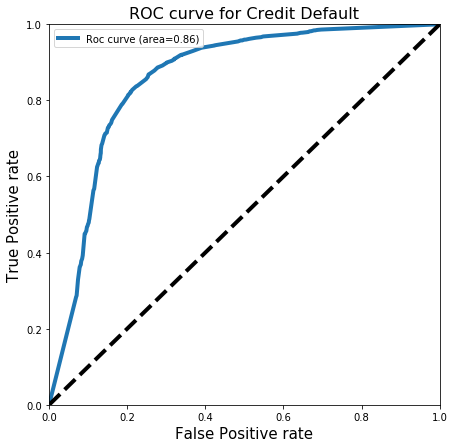

In [21]:
#Decision tree classifier evaluation
decision_tree = DecisionTreeClassifier(class_weight= 'balanced', criterion= 'gini', max_depth= 15, min_samples_leaf= 1, min_samples_split= 3, splitter= 'best')
model_decision_tree = model(decision_tree, X_train, y_train, X_test, y_test)

In [22]:
#random forest classifier hyperparamters setting

rr_param_grid = {'class_weight': ['balanced'],
                 'criterion': ['gini', 'entropy'],
                 'n_estimators': range(100, 200, 500)}
acc_scorer = make_scorer(accuracy_score)
rr_grid = GridSearchCV(RandomForestClassifier(), param_grid= rr_param_grid, cv = 10, scoring = acc_scorer)
rr_grid.fit(X_train, y_train)
print ("Best parameters: ", rr_grid.best_params_)
print ("Best score: ", rr_grid.best_score_)

Best parameters:  {'class_weight': 'balanced', 'criterion': 'gini', 'n_estimators': 100}
Best score:  0.925542950842


 
Accuracy on Train set:  0.997757922565
Accuracy on Test set:  0.930129835363
 
             precision    recall  f1-score   support

          0       0.96      0.89      0.93      3724
          1       0.90      0.97      0.93      3747

avg / total       0.93      0.93      0.93      7471

 
Confusion Matrix
               Predicted Defaulter  Predicted Not Defaulter
Defaulter                     3622                      125
Not Defaulter                  397                     3327


/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:638: UserWarning: Unrecognized location "Lower Right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


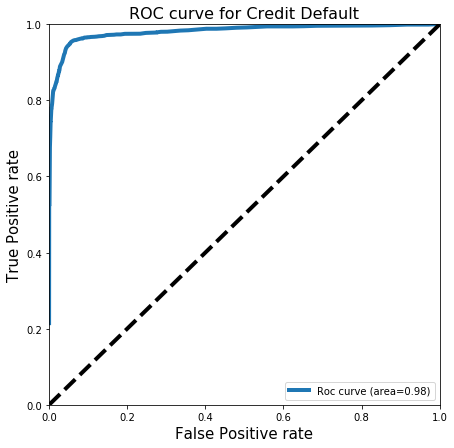

In [23]:
#random forest classifier evaluation
random_forest = RandomForestClassifier(class_weight= 'balanced',criterion= 'gini', n_estimators = 100)
model_random_forest = model(random_forest, X_train, y_train, X_test, y_test)

In [24]:
#SVM classifier implementation with RBF kernel
svm_param_grid = {'kernel': ['rbf']}
acc_scorer = make_scorer(accuracy_score)
svm_grid = GridSearchCV(SVC(), param_grid= svm_param_grid, cv = 10, scoring = acc_scorer)
svm_grid.fit(X_train, y_train)
print ("Best parameters: ", svm_grid.best_params_)
print ("Best score: ", svm_grid.best_score_)

Best parameters:  {'kernel': 'rbf'}
Best score:  0.952247097012


 
Accuracy on Train set:  0.992403707794
Accuracy on Test set:  0.957435416946
 
             precision    recall  f1-score   support

          0       0.94      0.98      0.96      3724
          1       0.98      0.93      0.96      3747

avg / total       0.96      0.96      0.96      7471

 
Confusion Matrix
               Predicted Defaulter  Predicted Not Defaulter
Defaulter                     3496                      251
Not Defaulter                   67                     3657


/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:638: UserWarning: Unrecognized location "Lower Right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


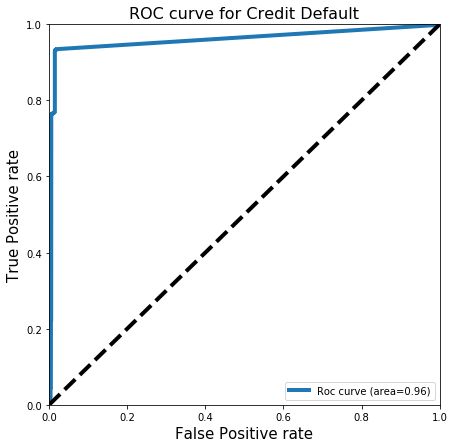

In [25]:
#SVM classifier evaluation
svm_classifier = SVC(kernel= 'rbf',probability= True)
model_svm_classifier = model(svm_classifier, X_train, y_train, X_test, y_test)

In [26]:
#All classifier accuracy summary
clfs = {'DecisionTreeClassifier': DecisionTreeClassifier(class_weight= 'balanced', criterion= 'gini', max_depth= 15, min_samples_leaf= 1, min_samples_split= 3, splitter= 'best', random_state = 42),
        'RandomForest': RandomForestClassifier(class_weight = 'balanced', criterion= 'gini', n_estimators= 100),
        'SVM': SVC(kernel= 'rbf')}

result_report = pd.DataFrame(columns= ['Model','F1_score','Accuracy','MAE'])

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_score = clf.score(X_test, y_test)
    
    t = pd.Series({
                    'Model': clf_name,
                    'F1_score': metrics.f1_score(y_test, y_pred),
                    'Accuracy': metrics.accuracy_score(y_test, y_pred),
                    'MAE': metrics.mean_absolute_error(y_test, y_pred)})
    result_report = result_report.append(t, ignore_index = True)
result_report

,Model,F1_score,Accuracy,MAE
0,DecisionTreeClassifier,0.814693,0.804176,0.195824
1,RandomForest,0.932852,0.930264,0.069736
2,SVM,0.956498,0.957435,0.042565
